<a href="https://colab.research.google.com/github/chennamsettisravya/21NN1A0570/blob/main/Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MobileNet V2

In [1]:
import random


import numpy as np

import tensorflow as tf


In [208]:

!pip install kaggle


In [210]:

kaggle_credentails = json.load(open("kaggle.json"))


In [211]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [212]:

!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:27<00:00, 36.3MB/s]
100% 2.04G/2.04G [01:27<00:00, 25.0MB/s]


In [213]:

# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [214]:
import shutil
import os

dirs_to_remove = [
    "/content/plantvillage dataset/color/Blueberry___healthy",
    "/content/plantvillage dataset/color/Soybean___healthy",
    "/content/plantvillage dataset/color/Raspberry___healthy",
    "/content/plantvillage dataset/color/Orange___Haunglongbing_(Citrus_greening)"
]

for directory in dirs_to_remove:
    if os.path.exists(directory):
        shutil.rmtree(directory)
        print(f"Removed: {directory}")
    else:
        print(f"Not found: {directory}")


Removed: /content/plantvillage dataset/color/Blueberry___healthy
Removed: /content/plantvillage dataset/color/Soybean___healthy
Removed: /content/plantvillage dataset/color/Raspberry___healthy
Removed: /content/plantvillage dataset/color/Orange___Haunglongbing_(Citrus_greening)


In [215]:

print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['393e4626-fd31-45aa-a67d-bb71837332ee___Mt.N.V_HL 9130.JPG', 'a5f23bc2-240d-4db0-8998-43a2cf2a0752___Mt.N.V_HL 6166.JPG', '22b7199f-581e-4330-b14f-4cb7b382340a___Mt.N.V_HL 6115.JPG', '0681edcd-e6f2-4ebe-8ef9-24d3e058e1ec___Mt.N.V_HL 8948.JPG', '8898c438-18f9-49f9-a9a0-17c86cd12b74___Mt.N.V_HL 9115.JPG']


In [216]:

# Dataset Path
base_dir = 'plantvillage dataset/color'


In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
# Unzip the downloaded dataset
with ZipFile("color.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
# Dowload the packages
!pip install split-folders

In [5]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 18.5 MB/s eta 0:00:00


In [6]:
import splitfolders
from re import sub
from skimage.io import  imread, imshow
from skimage.transform import  resize, rescale
from skimage.color import rgb2gray
import numpy as np
from os import listdir, path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,os.path
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [7]:
#Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Make a directory images
os.mkdir('images')

# Make subdirectories train, val, test
os.mkdir(os.path.join('images', 'train'))
os.mkdir(os.path.join('images', 'val'))
os.mkdir(os.path.join('images', 'test'))

In [217]:

splitfolders.ratio(base_dir,output = "images",seed = 42,ratio = (0.80,0.10,0.10))

Copying files: 41835 files [00:44, 929.68 files/s] 


In [10]:
# Remove the directories we saved before

TRAIN_PATH = "./images/train"
VAL_PATH = "./images/val"
TEST_PATH  = "./images/test"
PATHS = [TRAIN_PATH, VAL_PATH, TEST_PATH]

In [218]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [220]:
train_gen = data_gen.flow_from_directory(directory = '/content/images/train',
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

Found 34112 images belonging to 34 classes.


In [221]:
val_gen = data_gen.flow_from_directory(directory = '/content/images/val',
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

Found 4487 images belonging to 34 classes.


In [222]:
test_gen = data_gen.flow_from_directory(directory = '/content/images/test',
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          shuffle = False)

Found 4499 images belonging to 34 classes.


In [228]:
BATCH_SIZE = 32
IMG_SIZE = (255, 255)

data_dir = "/content/plantvillage dataset/color"
train_dataset = image_dataset_from_directory(data_dir,
                                             shuffle=True,
                                             label_mode = 'categorical',
                                             validation_split = 0.2,
                                             batch_size=BATCH_SIZE,
                                             seed = 42,
                                             subset = "training",
                                             image_size=IMG_SIZE)

Found 41835 files belonging to 34 classes.
Using 33468 files for training.


In [16]:
class_names = train_dataset.class_names
num_classes = len(class_names)

for i in range(1, num_classes + 1):
    print(str(i) + ". ", class_names[i - 1])

1.  Apple___Apple_scab
2.  Apple___Black_rot
3.  Apple___Cedar_apple_rust
4.  Apple___healthy
5.  Cherry_(including_sour)___Powdery_mildew
6.  Cherry_(including_sour)___healthy
7.  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8.  Corn_(maize)___Common_rust_
9.  Corn_(maize)___Northern_Leaf_Blight
10.  Corn_(maize)___healthy
11.  Grape___Black_rot
12.  Grape___Esca_(Black_Measles)
13.  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14.  Grape___healthy
15.  Peach___Bacterial_spot
16.  Peach___healthy
17.  Pepper,_bell___Bacterial_spot
18.  Pepper,_bell___healthy
19.  Potato___Early_blight
20.  Potato___Late_blight
21.  Potato___healthy
22.  Squash___Powdery_mildew
23.  Strawberry___Leaf_scorch
24.  Strawberry___healthy
25.  Tomato___Bacterial_spot
26.  Tomato___Early_blight
27.  Tomato___Late_blight
28.  Tomato___Leaf_Mold
29.  Tomato___Septoria_leaf_spot
30.  Tomato___Spider_mites Two-spotted_spider_mite
31.  Tomato___Target_Spot
32.  Tomato___Tomato_Yellow_Leaf_Curl_Virus
33.  Tomat

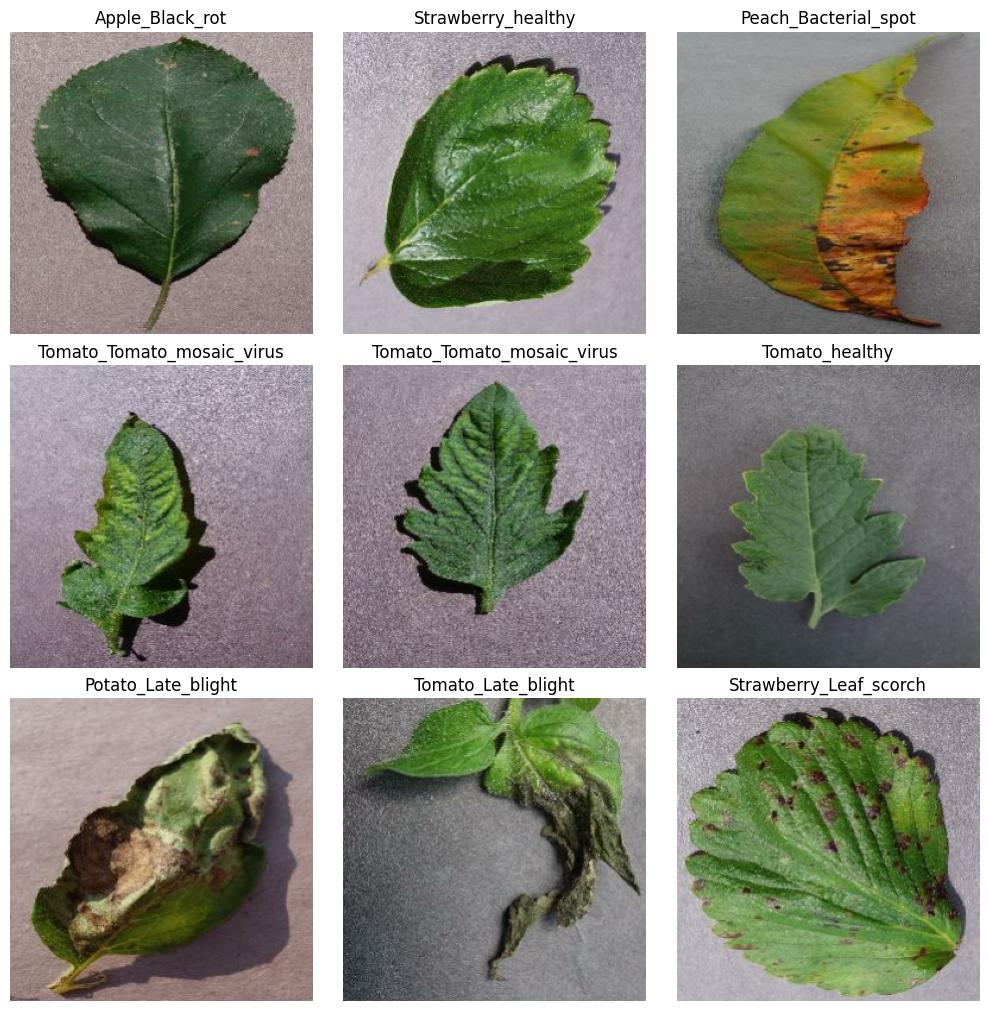

In [17]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = sub(r"[_]+","_",class_names[np.argmax(labels[i])])
        plt.title(title)
        plt.axis("off")

In [18]:
# Set some default variables
DATA_DIR = 'color'

# Check the content

pairs = list()
number = list()

for directory in os.listdir(path=DATA_DIR):
    columns = directory.split('___')
    columns.append(directory)

    sub_path = DATA_DIR + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))

    pairs.append(columns)

pairs = pd.DataFrame(pairs, columns=['Plant', 'Disease', 'Directory', 'Files'])
pairs.sort_values(by='Plant')

Plant                               Disease  \
0                     Apple                               healthy   
24                    Apple                      Cedar_apple_rust   
4                     Apple                            Apple_scab   
20                    Apple                             Black_rot   
23  Cherry_(including_sour)                               healthy   
14  Cherry_(including_sour)                        Powdery_mildew   
30             Corn_(maize)                          Common_rust_   
19             Corn_(maize)                  Northern_Leaf_Blight   
17             Corn_(maize)                               healthy   
16             Corn_(maize)   Cercospora_leaf_spot Gray_leaf_spot   
8                     Grape    Leaf_blight_(Isariopsis_Leaf_Spot)   
7                     Grape                               healthy   
3                     Grape                             Black_rot   
2                     Grape                  Esca_(Black_Measles)   
32                    Peach                               healthy   
5                     Peach                        Bacterial_spot   
10             Pepper,_bell                               healthy   
13             Pepper,_bell                        Bacterial_spot   
31                   Potato                           Late_blight   
27                   Potato                          Early_blight   
26                   Potato                               healthy   
29                   Squash                        Powdery_mildew   
15               Strawberry                               healthy   
28               Strawberry                           Leaf_scorch   
1                    Tomato  Spider_mites Two-spotted_spider_mite   
21                   Tomato                           Late_blight   
22                   Tomato                    Septoria_leaf_spot   
9                    Tomato         Tomato_Yellow_Leaf_Curl_Virus   
6                    Tomato                               healthy   
18                   Tomato                             Leaf_Mold   
12                   Tomato                           Target_Spot   
11                   Tomato                   Tomato_mosaic_virus   
25                   Tomato                          Early_blight   
33                   Tomato                        Bacterial_spot   

                                            Directory  Files  
0                                     Apple___healthy    100  
24                           Apple___Cedar_apple_rust    100  
4                                  Apple___Apple_scab    100  
20                                  Apple___Black_rot    100  
23                  Cherry_(including_sour)___healthy    100  
14           Cherry_(including_sour)___Powdery_mildew    100  
30                        Corn_(maize)___Common_rust_    100  
19                Corn_(maize)___Northern_Leaf_Blight    100  
17                             Corn_(maize)___healthy    100  
16  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...    100  
8          Grape___Leaf_blight_(Isariopsis_Leaf_Spot)    100  
7                                     Grape___healthy    100  
3                                   Grape___Black_rot    100  
2                        Grape___Esca_(Black_Measles)    100  
32                                    Peach___healthy    100  
5                              Peach___Bacterial_spot    100  
10                             Pepper,_bell___healthy    100  
13                      Pepper,_bell___Bacterial_spot    100  
31                               Potato___Late_blight    100  
27                              Potato___Early_blight    100  
26                                   Potato___healthy    100  
29                            Squash___Powdery_mildew    100  
15                               Strawberry___healthy    100  
28                           Strawberry___Leaf_scorch    100  
1       Tomato___Spider_mites T

In [19]:
# to make this notebook's output stable across runs

def reset_graph(seed=41):
    tf.random.set_seed(seed)
    np.random.seed(seed)

In [20]:
from keras.applications.mobilenet_v2 import MobileNetV2


model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
!apt-get install -y fonts-freefont-ttf  # Install the FreeFont package containing Arial
from PIL import ImageFont

font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSans.ttf", 70)  # Use a different font (FreeSans)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,388 kB of archives.
After this operation, 6,653 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-freefont-ttf all 20120503-10build1 [2,388 kB]
Fetched 2,388 kB in 1s (3,761 kB/s)
Selecting previously unselected package fonts-freefont-ttf.
(Reading database ... 125044 files and directories currently installed.)
Preparing to unpack .../fonts-freefont-ttf_20120503-10build1_all.deb ...
Unpacking fonts-freefont-ttf (20120503-10build1) ...
Setting up fonts-freefont-ttf (20120503-10build1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [22]:
import visualkeras
# Model should fit in A4 size
# Save to file to control size (image will be 1000x1000)
visualkeras.layered_view(model, legend=True, font=font, to_file='model_architecture.png', type_ignore=[visualkeras.SpacingDummyLayer]).show()
# Alternatively, the size can be set with figsize:
visualkeras.layered_view(model, legend=True, font=font, type_ignore=[visualkeras.SpacingDummyLayer]).show()  # edit this line

In [25]:
# We fix the parameters of the pretrained model
model.trainable = False

In [26]:
# Add data augmentation layers
augmentation = tf.keras.Sequential([
   tf.keras.layers.RandomFlip("horizontal"),
   tf.keras.layers.RandomRotation(0.15),
   tf.keras.layers.RandomZoom(0.2),
   tf.keras.layers.RandomContrast(0.15),
])

In [27]:
# Here we add final layers to the first model
inputs = model.input
x = augmentation(inputs)

x = BatchNormalization()(model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.45, seed=1234)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45, seed=1235)(x)
x = Flatten()(x)

outputs = Dense(34, activation='softmax')(x)

mobilenet_model = Model(inputs=inputs, outputs=outputs)

In [28]:
import visualkeras
# Model should fit in A4 size
# Save to file to control size (image will be 1000x1000)
visualkeras.layered_view(mobilenet_model, legend=True, font=font, to_file='model_architecture.png', type_ignore=[visualkeras.SpacingDummyLayer]).show()
# Alternatively, the size can be set with figsize:
visualkeras.layered_view(mobilenet_model, legend=True, font=font, type_ignore=[visualkeras.SpacingDummyLayer]).show()  # edit this line

In [29]:
mobilenet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 4,117,090 (15.71 MB)

 Trainable params: 1,856,546 (7.08 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [31]:
#count of distinct layers
print(len(mobilenet_model.layers))
# no of pooling layers
print(len([layer for layer in mobilenet_model.layers if isinstance(layer, tf.keras.layers.GlobalMaxPooling2D)]))
#Count of each distinct layers
from collections import Counter
Counter([layer.__class__.__name__ for layer in mobilenet_model.layers])


162
1


Counter({'InputLayer': 1,
         'Conv2D': 35,
         'BatchNormalization': 53,
         'ReLU': 35,
         'DepthwiseConv2D': 17,
         'ZeroPadding2D': 4,
         'Add': 10,
         'GlobalMaxPooling2D': 1,
         'Dense': 3,
         'Dropout': 2,
         'Flatten': 1})

In [32]:
metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.RootMeanSquaredError(),
           tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.AUC(curve='ROC'),
           tf.keras.metrics.AUC(curve='PR')]

In [33]:
reset_graph(seed=9)

mobilenet_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=metrics)

In [34]:
import time
start = time.time()
model_training = mobilenet_model.fit(train_gen, epochs=10 , validation_data=val_gen)
mn_training_time = time.time() - start

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.3932 - auc: 0.8481 - auc_1: 0.4171 - loss: 2.3671 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 20091662.0000 - precision: 0.6497 - recall: 0.2919 - root_mean_squared_error: 0.1463 - val_accuracy: 0.8271 - val_auc: 0.9930 - val_auc_1: 0.9112 - val_loss: 0.5320 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 7172775.5000 - val_precision: 0.8806 - val_recall: 0.7894 - val_root_mean_squared_error: 0.0847
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.8041 - auc: 0.9913 - auc_1: 0.8894 - loss: 0.6084 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 7683597.0000 - precision: 0.8629 - recall: 0.7560 - root_mean_squared_error: 0.0904 - val_accuracy: 0.9629 - val_auc: 0.9996 - val_auc_1: 0.9935 - val_loss: 0.1178 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 2118158.5000 - val_precision: 0.9706 - val_recall: 0.9524 - val_r

In [35]:
# Save history as JSON
with open("mobilenetv2_history.json", "w") as f:
    json.dump(model_training.history, f)

In [36]:
print(mn_training_time)

180.8786985874176


In [37]:
# Model Evaluation
print("Evaluating model...")

# Evaluate the model and unpack the results into separate variables
evaluation_results = mobilenet_model.evaluate(test_gen, steps=test_gen.samples // BATCH_SIZE)

# Extract loss and accuracy from the results
loss = evaluation_results[0]  # Loss is the first element
accuracy = evaluation_results[1]  # Accuracy is the second element

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Evaluating model...
106/106 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9943 - auc: 0.9994 - auc_1: 0.9978 - loss: 0.0213 - mean_absolute_error: 4.8993e-04 - mean_absolute_percentage_error: 244967.4688 - precision: 0.9947 - recall: 0.9943 - root_mean_squared_error: 0.0156
Test Accuracy: 99.38%


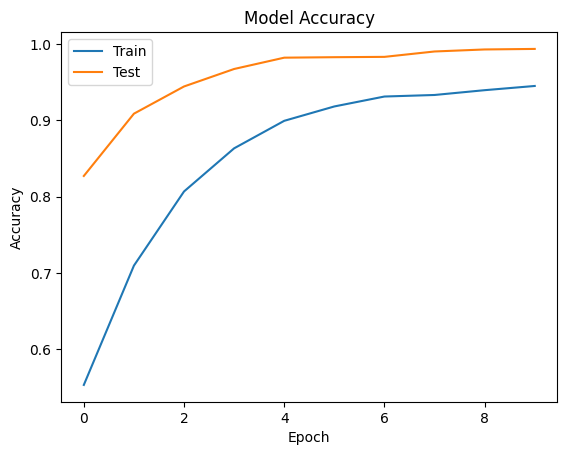

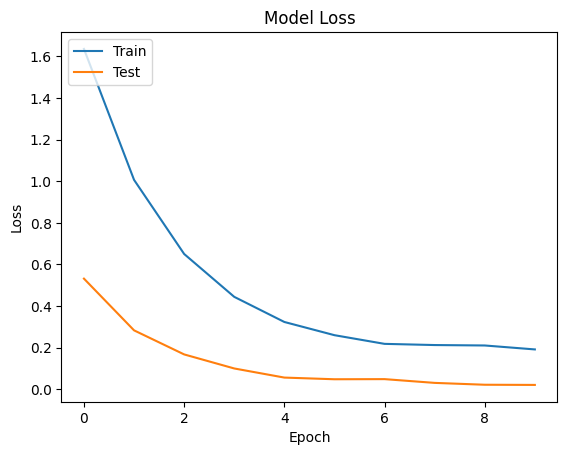

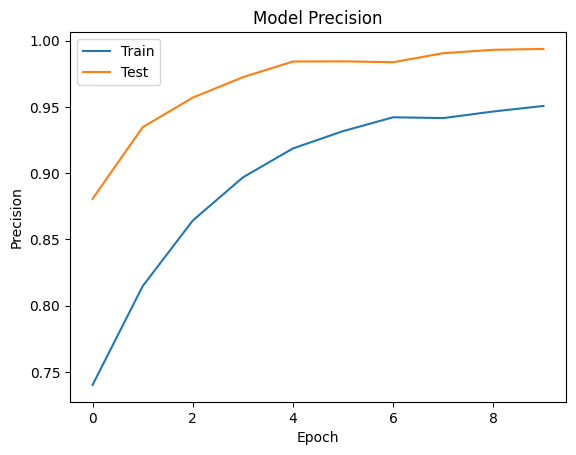

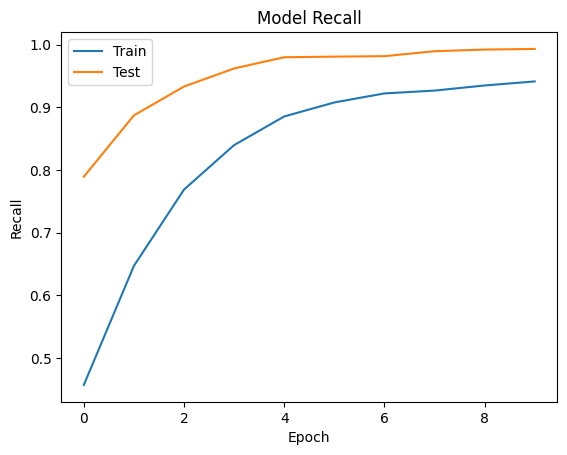

In [38]:
def smooth_curve(data, factor=0.6):
        smoothed = []
        for i in range(len(data)):
            if i == 0:
                smoothed.append(data[i])
            else:
                smoothed.append(smoothed[i - 1] * (1 - factor) + data[i] * factor)
        return smoothed

history = model_training

# Plot training & validation accuracy
plt.plot(smooth_curve(history.history['accuracy']), label='Train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(smooth_curve(history.history['loss']), label='Train')
plt.plot(smooth_curve(history.history['val_loss']), label='Test ')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation precision
plt.plot(smooth_curve(history.history['precision']), label='Train')
plt.plot(smooth_curve(history.history['val_precision']), label='Test')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation recall
plt.plot(smooth_curve(history.history['recall']), label='Train')
plt.plot(smooth_curve(history.history['val_recall']), label='Test')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [39]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step


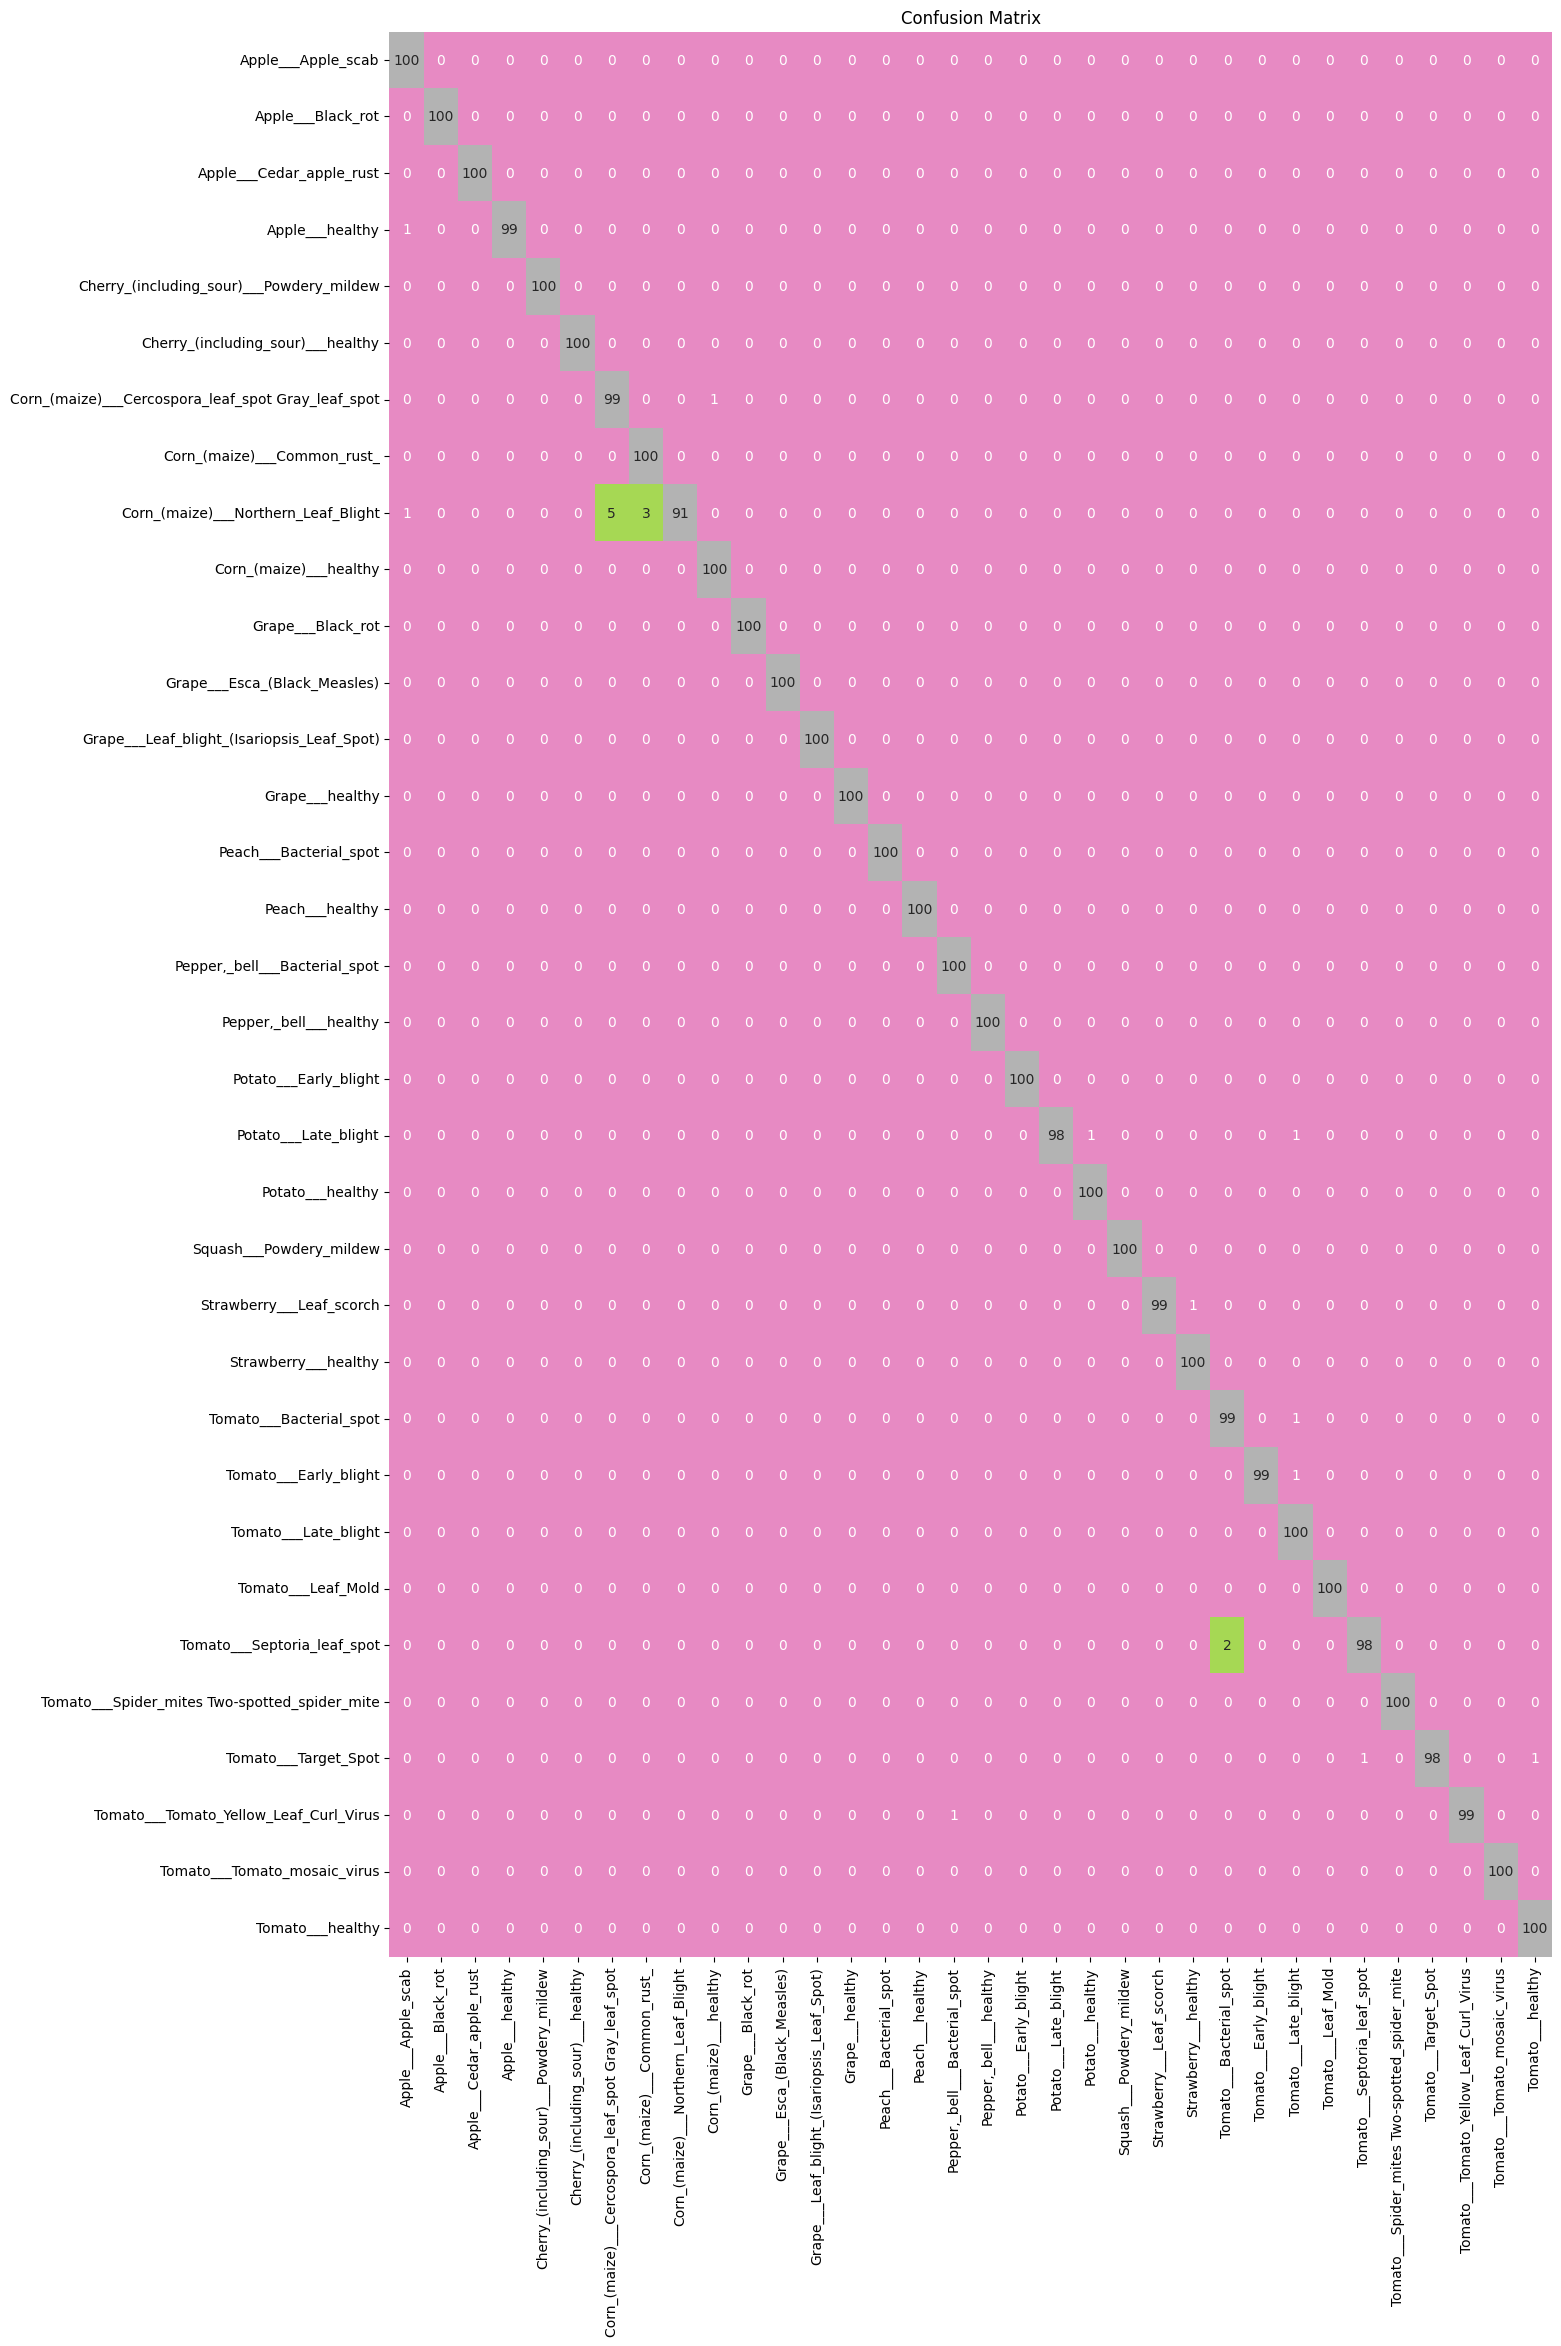

In [40]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Confusion Matrix and Classification Report
y_pred = np.argmax(mobilenet_model.predict(test_gen), axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Confusion Matrix
CM = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 25))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Set2',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [42]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Cherry_(including_sour)___Powdery_mildew',
 5: 'Cherry_(including_sour)___healthy',
 6: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 7: 'Corn_(maize)___Common_rust_',
 8: 'Corn_(maize)___Northern_Leaf_Blight',
 9: 'Corn_(maize)___healthy',
 10: 'Grape___Black_rot',
 11: 'Grape___Esca_(Black_Measles)',
 12: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 13: 'Grape___healthy',
 14: 'Peach___Bacterial_spot',
 15: 'Peach___healthy',
 16: 'Pepper,_bell___Bacterial_spot',
 17: 'Pepper,_bell___healthy',
 18: 'Potato___Early_blight',
 19: 'Potato___Late_blight',
 20: 'Potato___healthy',
 21: 'Squash___Powdery_mildew',
 22: 'Strawberry___Leaf_scorch',
 23: 'Strawberry___healthy',
 24: 'Tomato___Bacterial_spot',
 25: 'Tomato___Early_blight',
 26: 'Tomato___Late_blight',
 27: 'Tomato___Leaf_Mold',
 28: 'Tomato___Septoria_leaf_spot',
 29: 'Tomato___Spider_mites Two-spotted_spide

In [43]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [44]:
model.save('drive/MyDrive/trained_models/plant_disease_prediction_model.h5')

In [45]:
model.save('mobile_net_new.h5')

#Xception


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.metrics import AUC

In [47]:
num_classes = 34

# Load Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer with 50% rate
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)  # Dropout layer with 30% rate
predictions = Dense(num_classes, activation='softmax')(x)

# Build the model
xception_model = Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
# Freeze the layers of Xception
for layer in base_model.layers:
    layer.trainable = False

# Initial learning rate
initial_lr = 1e-3

# Compile the model with AUC metric
xception_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=metrics
)

# Callbacks
checkpoint_cb = ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

In [49]:
#count of distinct layers
print(len(xception_model.layers))
# no of pooling layers
print(len([layer for layer in xception_model.layers if isinstance(layer, tf.keras.layers.GlobalMaxPooling2D)]))
#Count of each distinct layers
from collections import Counter
Counter([layer.__class__.__name__ for layer in xception_model.layers])


138
0


Counter({'InputLayer': 1,
         'Conv2D': 6,
         'BatchNormalization': 40,
         'Activation': 35,
         'SeparableConv2D': 34,
         'MaxPooling2D': 4,
         'Add': 12,
         'GlobalAveragePooling2D': 1,
         'Dense': 3,
         'Dropout': 2})

In [50]:
# Train the model (First Phase - Frozen Base Model)
import time
start = time.time()


xception_model_training = xception_model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb, reduce_lr_cb]
)
xception_training_time = time.time() - start
print(xception_training_time)

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 57s 394ms/step - accuracy: 0.2253 - auc: 0.9792 - auc_1: 0.8484 - loss: 2.8498 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 7851504.0000 - precision: 0.9738 - recall: 0.7155 - root_mean_squared_error: 0.0864 - val_accuracy: 0.7041 - val_auc: 0.9879 - val_auc_1: 0.7882 - val_loss: 1.0010 - val_mean_absolute_error: 0.0293 - val_mean_absolute_percentage_error: 14674485.0000 - val_precision: 0.8731 - val_recall: 0.4776 - val_root_mean_squared_error: 0.1130 - learning_rate: 0.0010
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 31s 287ms/step - accuracy: 0.6230 - auc: 0.9736 - auc_1: 0.6930 - loss: 1.2004 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 15088509.0000 - precision: 0.7953 - recall: 0.4724 - root_mean_squared_error: 0.1219 - val_accuracy: 0.7979 - val_auc: 0.9934 - val_auc_1: 0.8856 - val_loss: 0.6739 - val_mean_absolute_error: 0.0209 - val_mean_absolute_percentage_error: 10463303.0000 - val_precision: 0.9115 - 

In [51]:
# Save history as JSON
with open("xception_history.json", "w") as f:
    json.dump(xception_model_training.history, f)

In [52]:
# Model Evaluation
print("Evaluating model...")

# Evaluate the model and unpack the results into separate variables
x_evaluation_results = xception_model.evaluate(test_gen, steps=test_gen.samples // BATCH_SIZE)

# Extract loss and accuracy from the results
x_loss = x_evaluation_results[0]  # Loss is the first element
x_accuracy = x_evaluation_results[1]  # Accuracy is the second element

print(f"Test Accuracy: {x_accuracy * 100:.2f}%")

Evaluating model...
106/106 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.9901 - auc: 1.0000 - auc_1: 0.9995 - loss: 0.0472 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 1100123.0000 - precision: 0.9934 - recall: 0.9876 - root_mean_squared_error: 0.0232
Test Accuracy: 98.44%


In [53]:
from scipy.signal import savgol_filter
import numpy as np

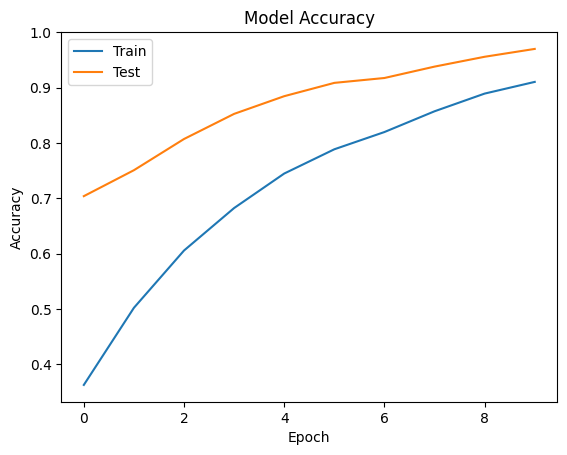

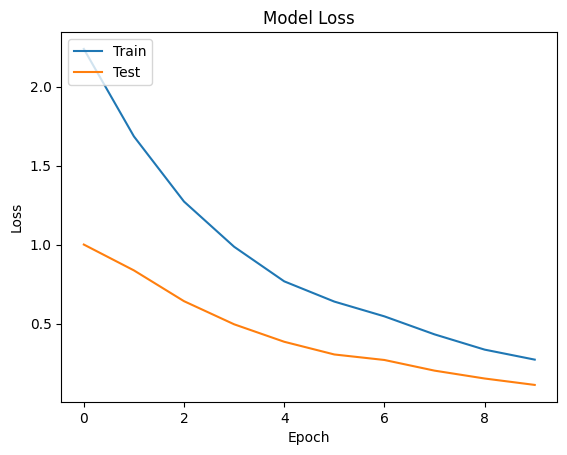

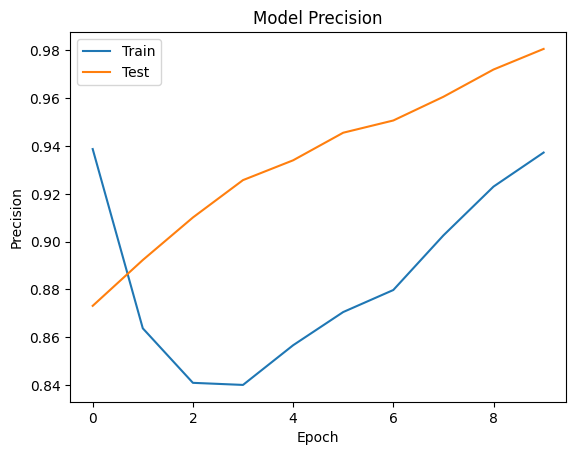

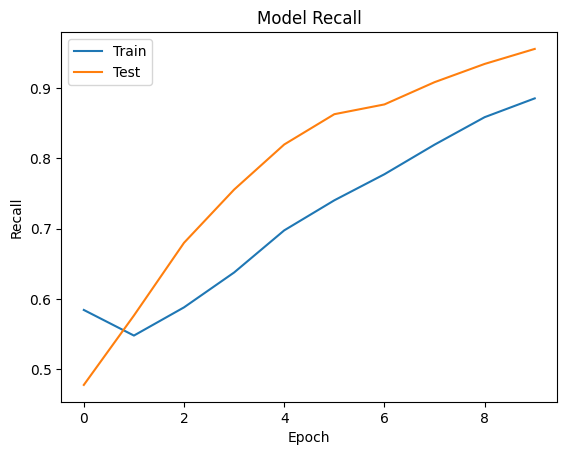

In [54]:
def smooth_curve(data, factor=0.5):
        smoothed = []
        for i in range(len(data)):
            if i == 0:
                smoothed.append(data[i])
            else:
                smoothed.append(smoothed[i - 1] * (1 - factor) + data[i] * factor)
        return smoothed

history = xception_model_training

# Plot training & validation accuracy
plt.plot(smooth_curve(history.history['accuracy']), label='Train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(smooth_curve(history.history['loss']), label='Train')
plt.plot(smooth_curve(history.history['val_loss']), label='Test ')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation precision
plt.plot(smooth_curve(history.history['precision']), label='Train')
plt.plot(smooth_curve(history.history['val_precision']), label='Test')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation recall
plt.plot(smooth_curve(history.history['recall']), label='Train')
plt.plot(smooth_curve(history.history['val_recall']), label='Test')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [55]:
xception_model.save('xception_new.h5')

#CNN

In [66]:


cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)))
cnn_model.add(layers.MaxPooling2D(2, 2))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))


cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(256, activation='relu'))
cnn_model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

In [67]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 34)                  │           8,738 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,804,130 (182.36 MB)

 Trainable params: 47,804,130 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Compile the Model
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=metrics)

In [68]:
#count of distinct layers
print(len(cnn_model.layers))
# no of pooling layers
print(len([layer for layer in cnn_model.layers if isinstance(layer, tf.keras.layers.GlobalMaxPooling2D)]))
#Count of each distinct layers
from collections import Counter
Counter([layer.__class__.__name__ for layer in cnn_model.layers])


7
0


Counter({'Conv2D': 2, 'MaxPooling2D': 2, 'Flatten': 1, 'Dense': 2})

In [61]:
# Training the Model
import time
start = time.time()
cnn_model_training = cnn_model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // BATCH_SIZE ,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=val_gen,
    validation_steps=val_gen.samples // BATCH_SIZE  # Validation steps
)
cnn_training_time = time.time() - start


Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 185ms/step - accuracy: 0.0483 - auc: 0.9271 - auc_1: 0.7444 - loss: 7.3530 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 9743423.0000 - precision: 0.9381 - recall: 0.6820 - root_mean_squared_error: 0.0984 - val_accuracy: 0.1041 - val_auc: 0.6670 - val_auc_1: 0.0768 - val_loss: 3.3740 - val_mean_absolute_error: 0.0567 - val_mean_absolute_percentage_error: 28334782.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_root_mean_squared_error: 0.1679
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.1250 - auc: 0.7515 - auc_1: 0.0816 - loss: 3.1711 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 27938712.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - root_mean_squared_error: 0.1669 - val_accuracy: 0.1070 - val_auc: 0.6753 - val_auc_1: 0.0822 - val_loss: 3.3533 - val_mean_absolute_error: 0.0566 - val_mean_absolute_percentage_error: 28293838.0000 - val_precision: 0.0000e+00 - val_re

In [62]:
cnn_model.save('cnn_new.h5')

In [63]:
print(cnn_training_time)

136.04460787773132


In [64]:
# Save history as JSON
with open("cnn_history.json", "w") as f:
    json.dump(cnn_model_training.history, f)

In [65]:
# Model Evaluation
print("Evaluating model...")

# Evaluate the model and unpack the results into separate variables
c_evaluation_results = cnn_model.evaluate(test_gen, steps=test_gen.samples // BATCH_SIZE)

# Extract loss and accuracy from the results
c_loss = c_evaluation_results[0]  # Loss is the first element
c_accuracy = c_evaluation_results[1]  # Accuracy is the second element

print(f"Test Accuracy: {c_accuracy * 100:.2f}%")


Evaluating model...
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.7679 - auc: 0.9854 - auc_1: 0.8528 - loss: 0.7588 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 10636468.0000 - precision: 0.8842 - recall: 0.6721 - root_mean_squared_error: 0.0965
Test Accuracy: 81.60%


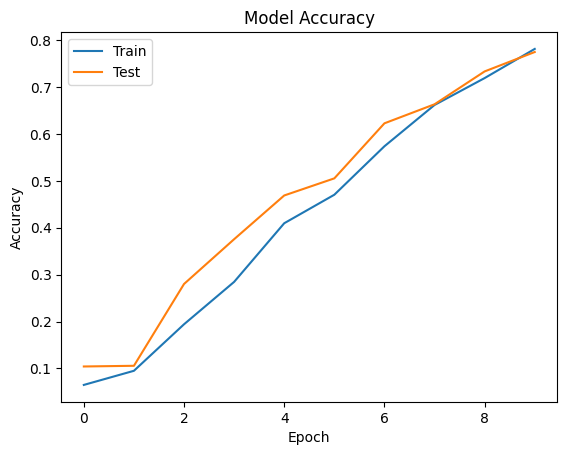

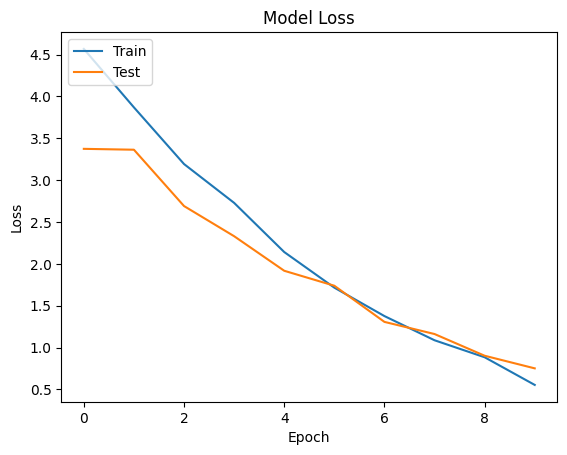

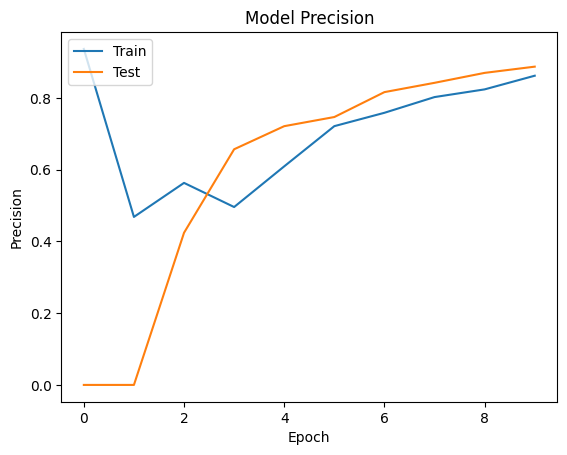

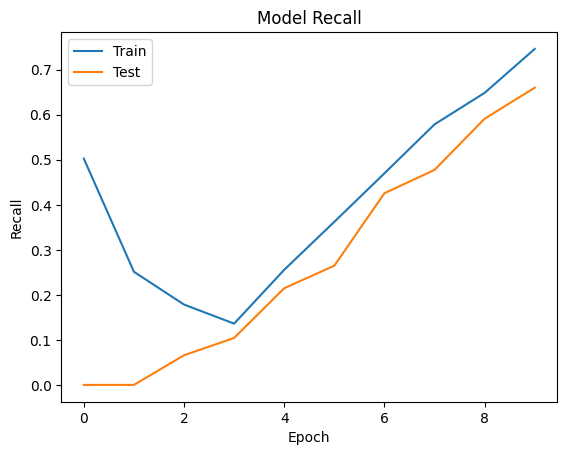

In [69]:
def smooth_curve(data, factor=0.5):
        smoothed = []
        for i in range(len(data)):
            if i == 0:
                smoothed.append(data[i])
            else:
                smoothed.append(smoothed[i - 1] * (1 - factor) + data[i] * factor)
        return smoothed

history = cnn_model_training

# Plot training & validation accuracy
plt.plot(smooth_curve(history.history['accuracy']), label='Train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(smooth_curve(history.history['loss']), label='Train')
plt.plot(smooth_curve(history.history['val_loss']), label='Test ')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation precision
plt.plot(smooth_curve(history.history['precision']), label='Train')
plt.plot(smooth_curve(history.history['val_precision']), label='Test')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation recall
plt.plot(smooth_curve(history.history['recall']), label='Train')
plt.plot(smooth_curve(history.history['val_recall']), label='Test')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


#Efficient Net

In [143]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

from keras.src.applications.efficientnet_v2 import EfficientNetV2

# Specify a valid preset name or provide custom 'blocks_args'
e_model = EfficientNetV2(
    width_coefficient=0.5,
    depth_coefficient=0.5,
    default_size=128,
    dropout_rate=0.5,
    weights=None,
    input_shape=(224, 224, 3),
    classes=34,
    # Choose a preset name like 'efficientnetv2-s', 'efficientnetv2-m', etc.
    name='efficientnetv2-s'
)


In [146]:
e_model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=metrics
)

checkpoint_path = "/kaggle/working/two_branch_efficientnetv2scustom_L100/cp-{epoch:04d}.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         mode='max',
                                                         verbose=1)


In [147]:
# Training the Model
import time
start = time.time()
e_history =e_model.fit(
    train_gen,
    validation_data=val_gen,
    verbose=1,
    epochs=10,
    callbacks=[checkpoint_callback]
)
e_history_training_time = time.time() - start


Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 153ms/step - accuracy: 0.0580 - auc_4: 0.5463 - auc_5: 0.0435 - loss: 5.8700 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 28179974.0000 - precision_6: 0.1950 - recall_6: 0.0155 - root_mean_squared_error: 0.1766 - val_accuracy: 0.1778 - val_auc_4: 0.7473 - val_auc_5: 0.1871 - val_loss: 3.1234 - val_mean_absolute_error: 0.0553 - val_mean_absolute_percentage_error: 27655702.0000 - val_precision_6: 1.0000 - val_recall_6: 0.0044 - val_root_mean_squared_error: 0.1647
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.0938 - auc_4: 0.7486 - auc_5: 0.1317 - loss: 3.0650 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 27321438.0000 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00 - root_mean_squared_error: 0.1653 - val_accuracy: 0.1960 - val_auc_4: 0.7634 - val_auc_5: 0.1945 - val_loss: 3.1301 - val_mean_absolute_error: 0.0554 - val_mean_absolute_percentage_error: 27703334.0000 - val_precision_6: 1.00

In [148]:
# Model Evaluation
print("Evaluating model...")

# Evaluate the model and unpack the results into separate variables
e_evaluation_results = e_model.evaluate(train_gen, steps=train_gen.samples // BATCH_SIZE)
e_accuracy = e_evaluation_results[1]
print(f"Test Accuracy: {e_accuracy* 100:.2f}%")


Evaluating model...
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.7876 - auc_4: 0.9874 - auc_5: 0.8511 - loss: 0.9779 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 14358816.0000 - precision_6: 0.9710 - recall_6: 0.5081 - root_mean_squared_error: 0.1063
Test Accuracy: 79.92%


In [149]:
# Save history as JSON
with open("e_history.json", "w") as f:
    json.dump(e_history.history, f)

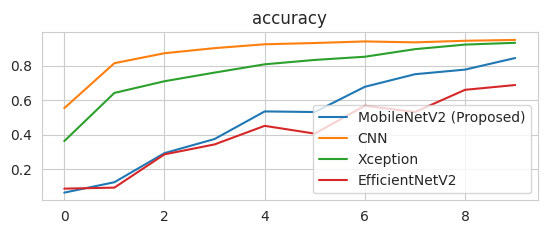

In [150]:
from matplotlib  import pyplot
pyplot.subplot(212)
pyplot.title('accuracy')
pyplot.plot(cnn_model_training.history['accuracy'], label='MobileNetV2 (Proposed)')
pyplot.plot(model_training.history['accuracy'], label='CNN')
pyplot.plot(xception_model_training.history['accuracy'], label='Xception')
pyplot.plot(e_history.history['accuracy'], label='EfficientNetV2')
pyplot.legend()
pyplot.show()

#Accurac


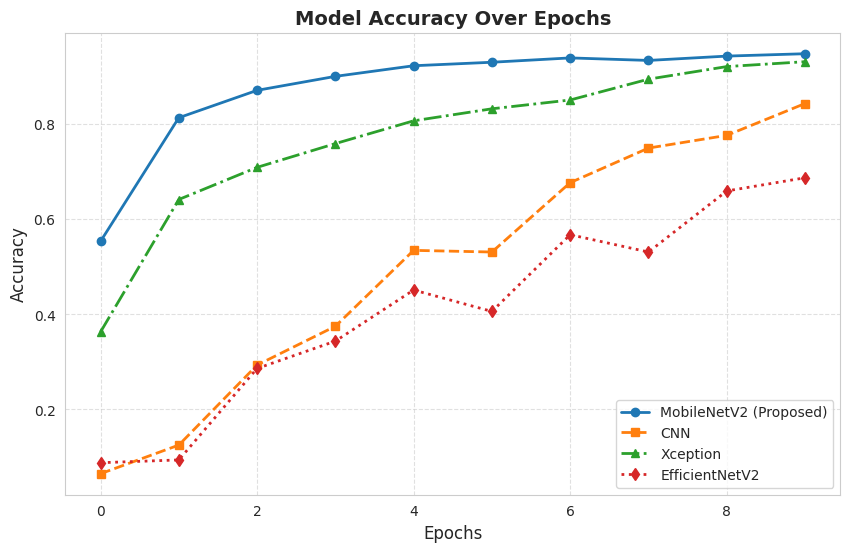

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a beautiful style
sns.set_style("whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot accuracy for different models with markers
plt.plot(model_training.history['val_accuracy'], marker='o', linestyle='-', label='MobileNetV2 (Proposed)', linewidth=2)
plt.plot(cnn_model_training.history['val_accuracy'], marker='s', linestyle='--', label='CNN', linewidth=2)
plt.plot(xception_model_training.history['val_accuracy'], marker='^', linestyle='-.', label='Xception', linewidth=2)
plt.plot(e_history.history['val_accuracy'], marker='d', linestyle=':', label='EfficientNetV2', linewidth=2)

# Title and labels
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display legend with a better location
plt.legend(loc='lower right', fontsize=10)

# Show the grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


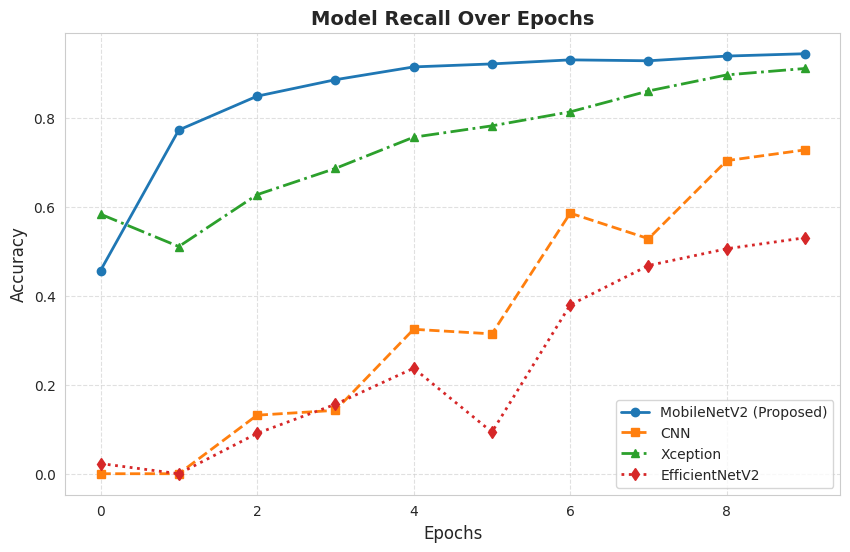

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a beautiful style
sns.set_style("whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot accuracy for different models with markers
plt.plot(model_training.history['val_recall'], marker='o', linestyle='-', label='MobileNetV2 (Proposed)', linewidth=2)
plt.plot(cnn_model_training.history['val_recall'], marker='s', linestyle='--', label='CNN', linewidth=2)
plt.plot(xception_model_training.history['val_recall'], marker='^', linestyle='-.', label='Xception', linewidth=2)
plt.plot(e_history.history['val_recall_6'], marker='d', linestyle=':', label='EfficientNetV2', linewidth=2)

# Title and labels
plt.title('Model Recall Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display legend with a better location
plt.legend(loc='lower right', fontsize=10)

# Show the grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


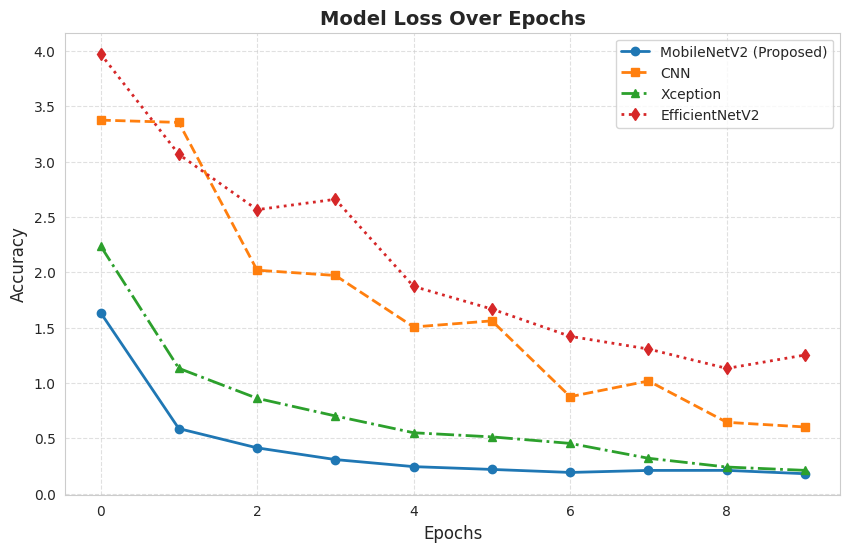

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a beautiful style
sns.set_style("whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot accuracy for different models with markers
plt.plot(model_training.history['val_loss'], marker='o', linestyle='-', label='MobileNetV2 (Proposed)', linewidth=2)
plt.plot(cnn_model_training.history['val_loss'], marker='s', linestyle='--', label='CNN', linewidth=2)
plt.plot(xception_model_training.history['val_loss'], marker='^', linestyle='-.', label='Xception', linewidth=2)
plt.plot(e_history.history['val_loss'], marker='d', linestyle=':', label='EfficientNetV2', linewidth=2)

# Title and labels
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display legend with a better location
plt.legend(loc='upper right', fontsize=10)

# Show the grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


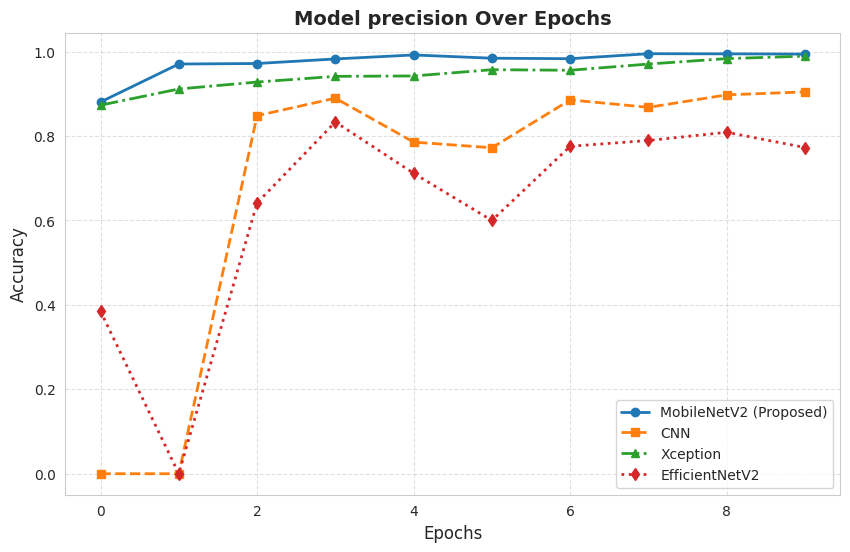

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a beautiful style
sns.set_style("whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot accuracy for different models with markers
plt.plot(model_training.history['val_precision'], marker='o', linestyle='-', label='MobileNetV2 (Proposed)', linewidth=2)
plt.plot(cnn_model_training.history['val_precision'], marker='s', linestyle='--', label='CNN', linewidth=2)
plt.plot(xception_model_training.history['val_precision'], marker='^', linestyle='-.', label='Xception', linewidth=2)
plt.plot(e_history.history['val_precision_6'], marker='d', linestyle=':', label='EfficientNetV2', linewidth=2)

# Title and labels
plt.title('Model precision Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display legend with a better location
plt.legend(loc='lower right', fontsize=10)

# Show the grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [168]:
y_pred_efficientnet = e_model.predict(test_gen)  # Use the trained model
y_pred_cnn= cnn_model.predict(test_gen)
y_pred_mobilenet = model.predict(test_gen)
y_pred_xception = xception_model.predict(test_gen)

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step


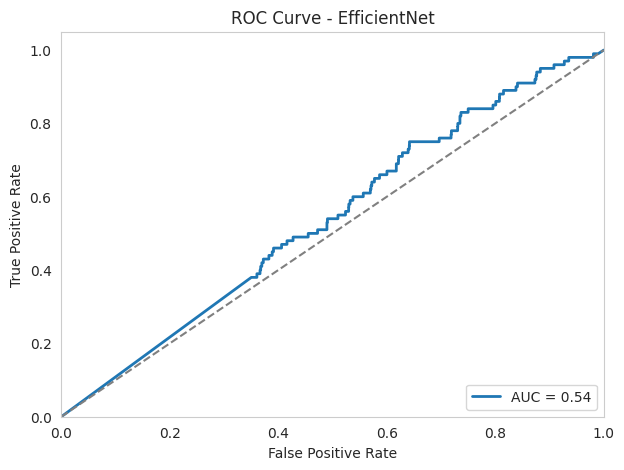

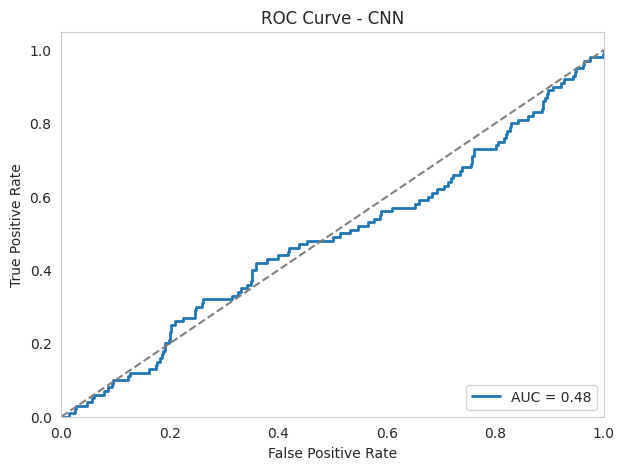

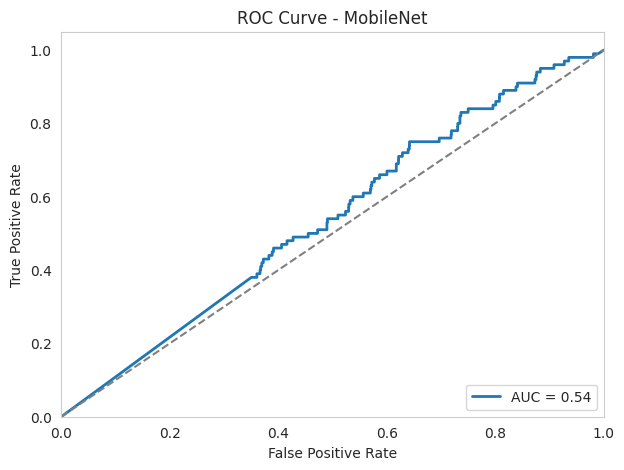

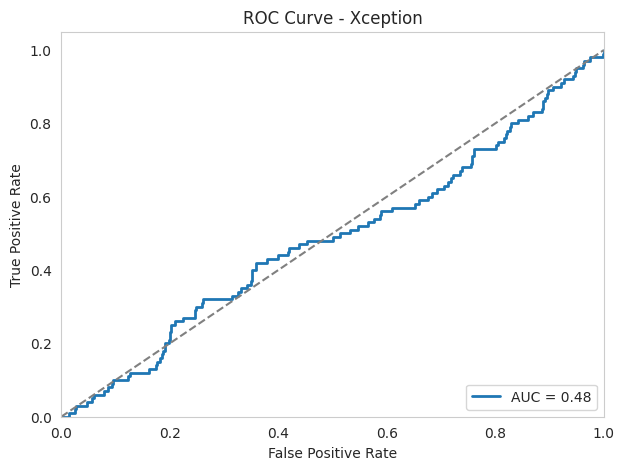

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 1: Get true labels
y_true = test_gen.labels

# Convert one-hot encoded labels to single-class labels if needed
if len(y_true.shape) > 1 and y_true.shape[1] > 1:
    y_true = np.argmax(y_true, axis=1)

# Dictionary of models and their predictions
models = {
    "EfficientNet": y_pred_efficientnet,
    "CNN": y_pred_cnn,
    "MobileNet": y_pred_mobilenet,
    "Xception": y_pred_xception
}

# Step 2: Plot ROC curve for each model separately
for model_name, y_pred in models.items():
    plt.figure(figsize=(7, 5))  # Create a new figure for each model

    # Extract probability of the positive class if multi-class
    if y_pred.shape[1] > 1:
        y_pred = y_pred[:, 1]  # Change index based on the positive class

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line

    # Formatting
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid()

    # Show the plot for each model separately
    plt.show()


In [191]:
import numpy as np
y_pred_efficientnet = np.argmax(y_pred_efficientnet, axis=1)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
y_pred_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
y_pred_xception = np.argmax(y_pred_xception, axis=1)
y_true= test_gen.classes

In [192]:
class_labels = list(test_gen.class_indices.keys())
# Generate confusion matrices
cm_cnn = confusion_matrix(y_true, y_pred_cnn)
cm_mobilenet = confusion_matrix(y_true, y_pred_mobilenet)
cm_xception = confusion_matrix(y_true, y_pred_xception)
cm_efficientnet = confusion_matrix(y_true, y_pred_efficientnet)

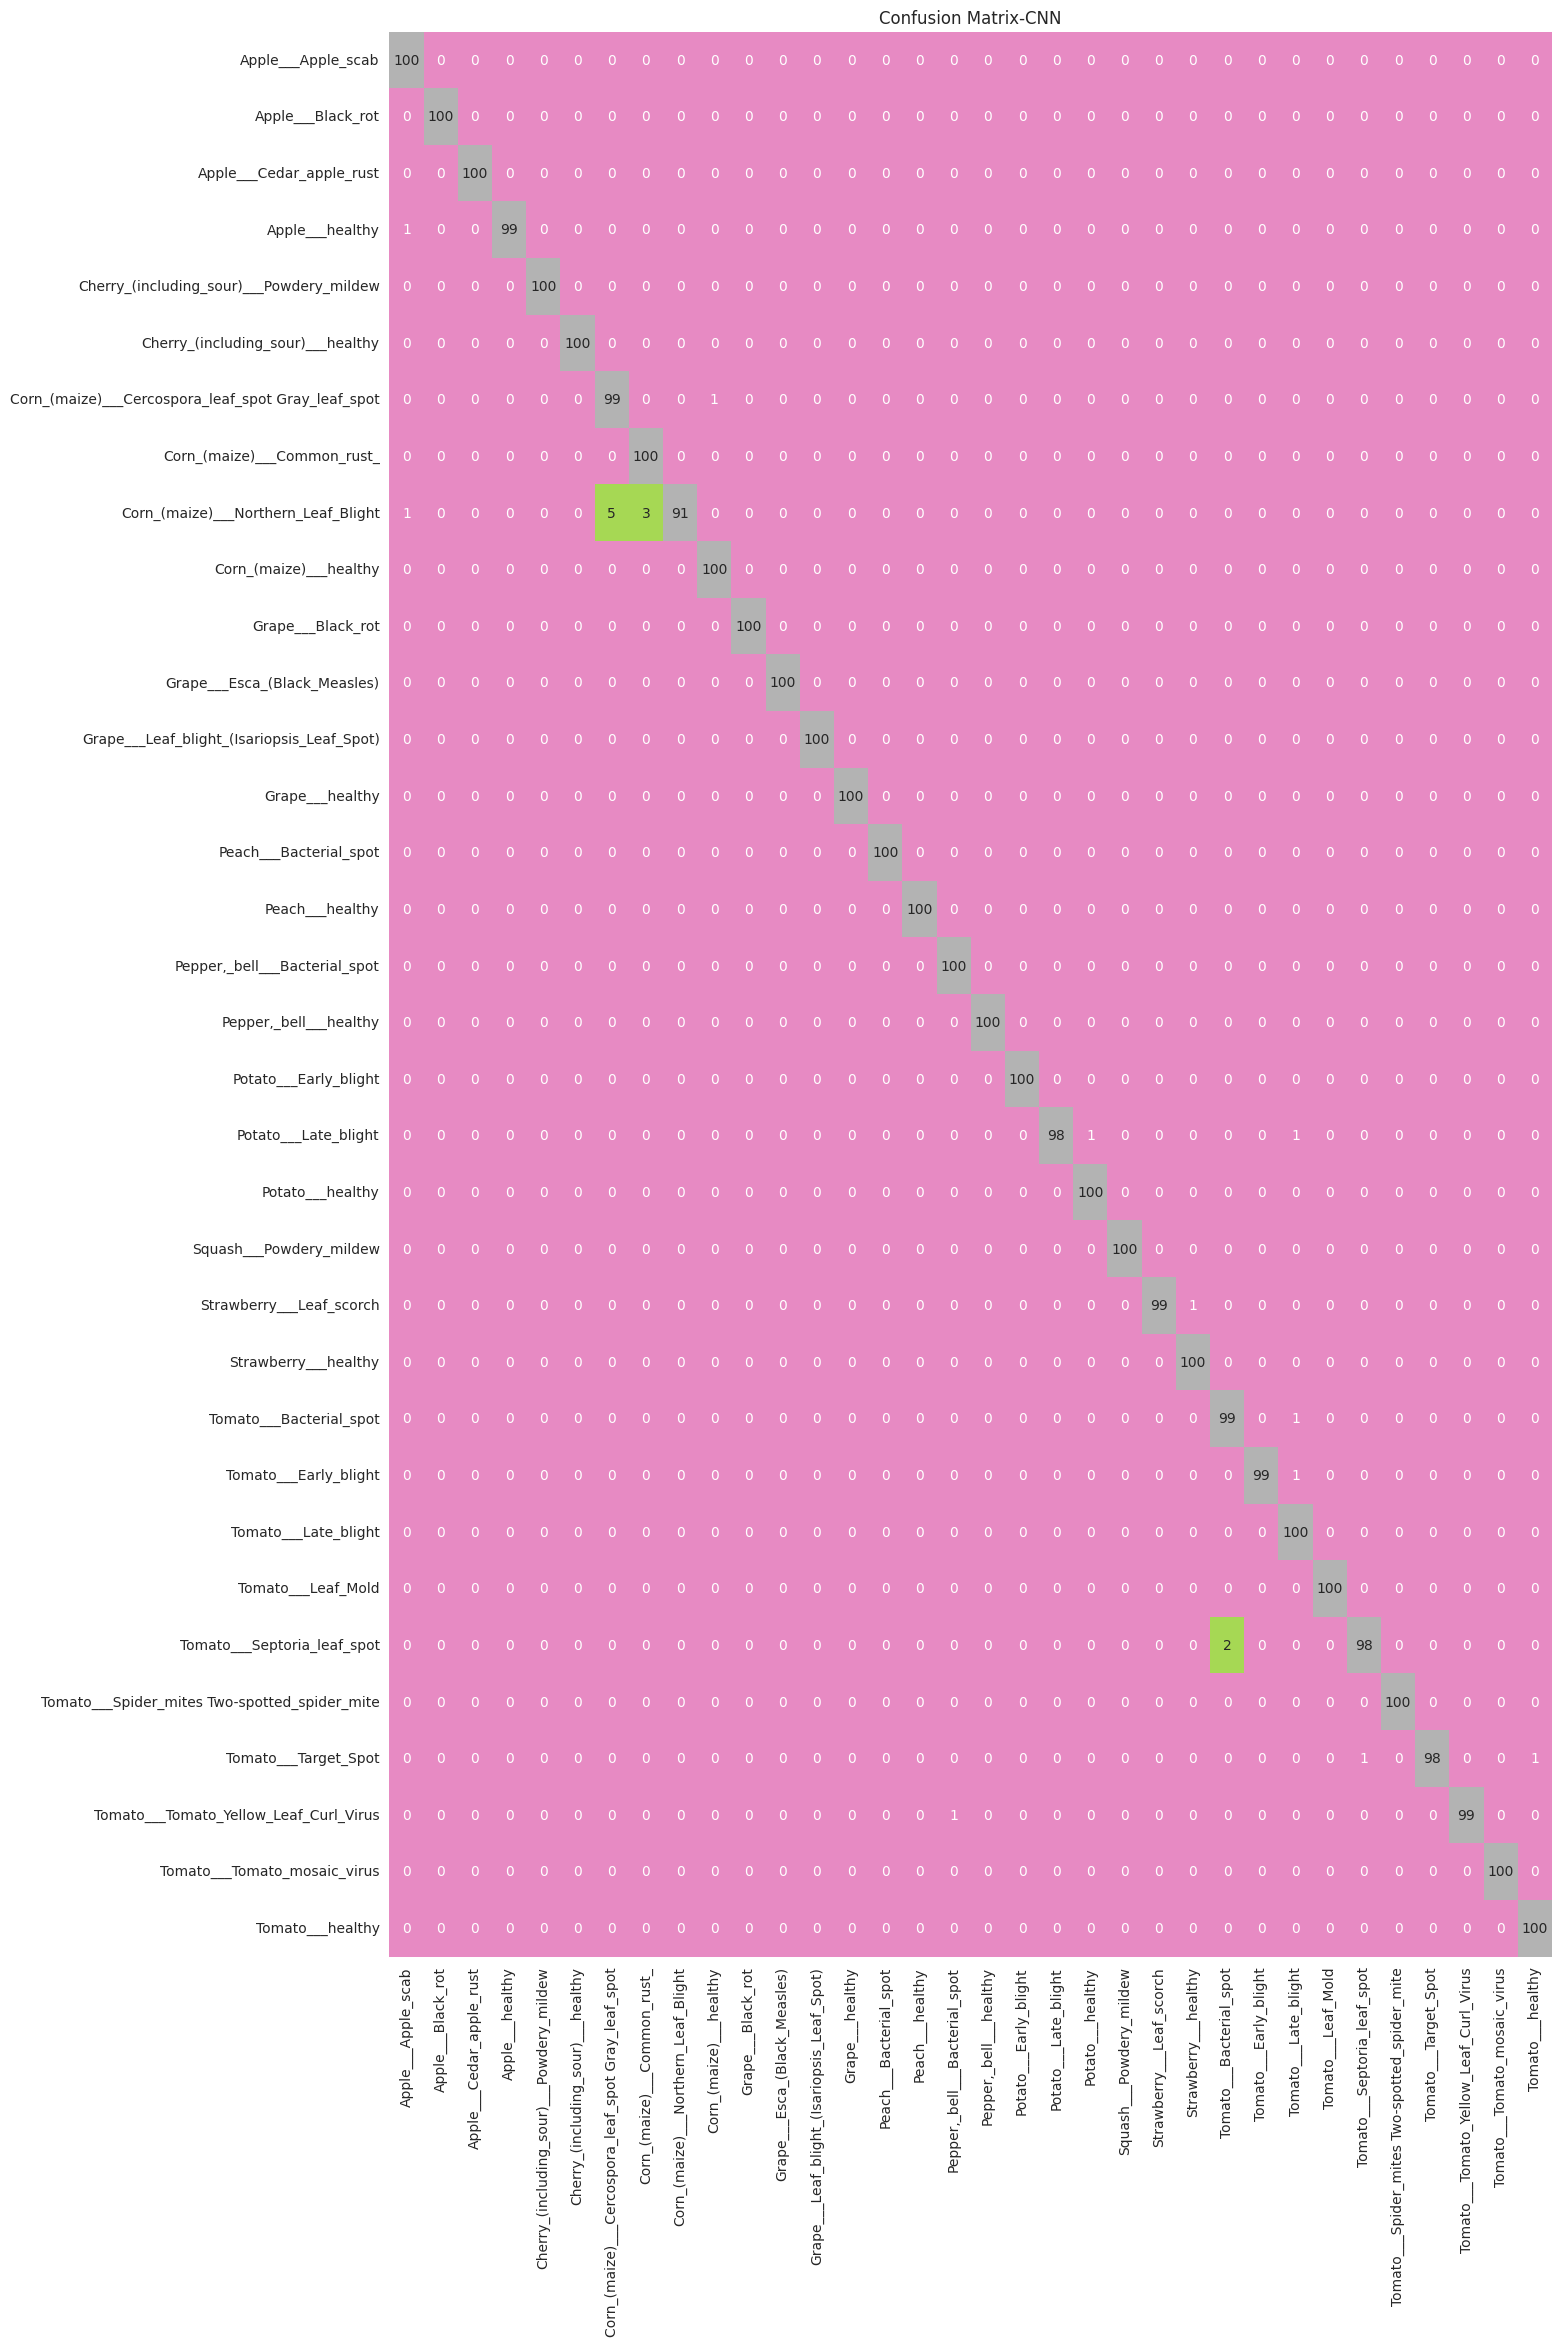

In [193]:
plt.figure(figsize=(15, 25))
sns.heatmap(cm_cnn, fmt='g', center=True, cbar=False, annot=True, cmap='Set2',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix-CNN')
plt.show()

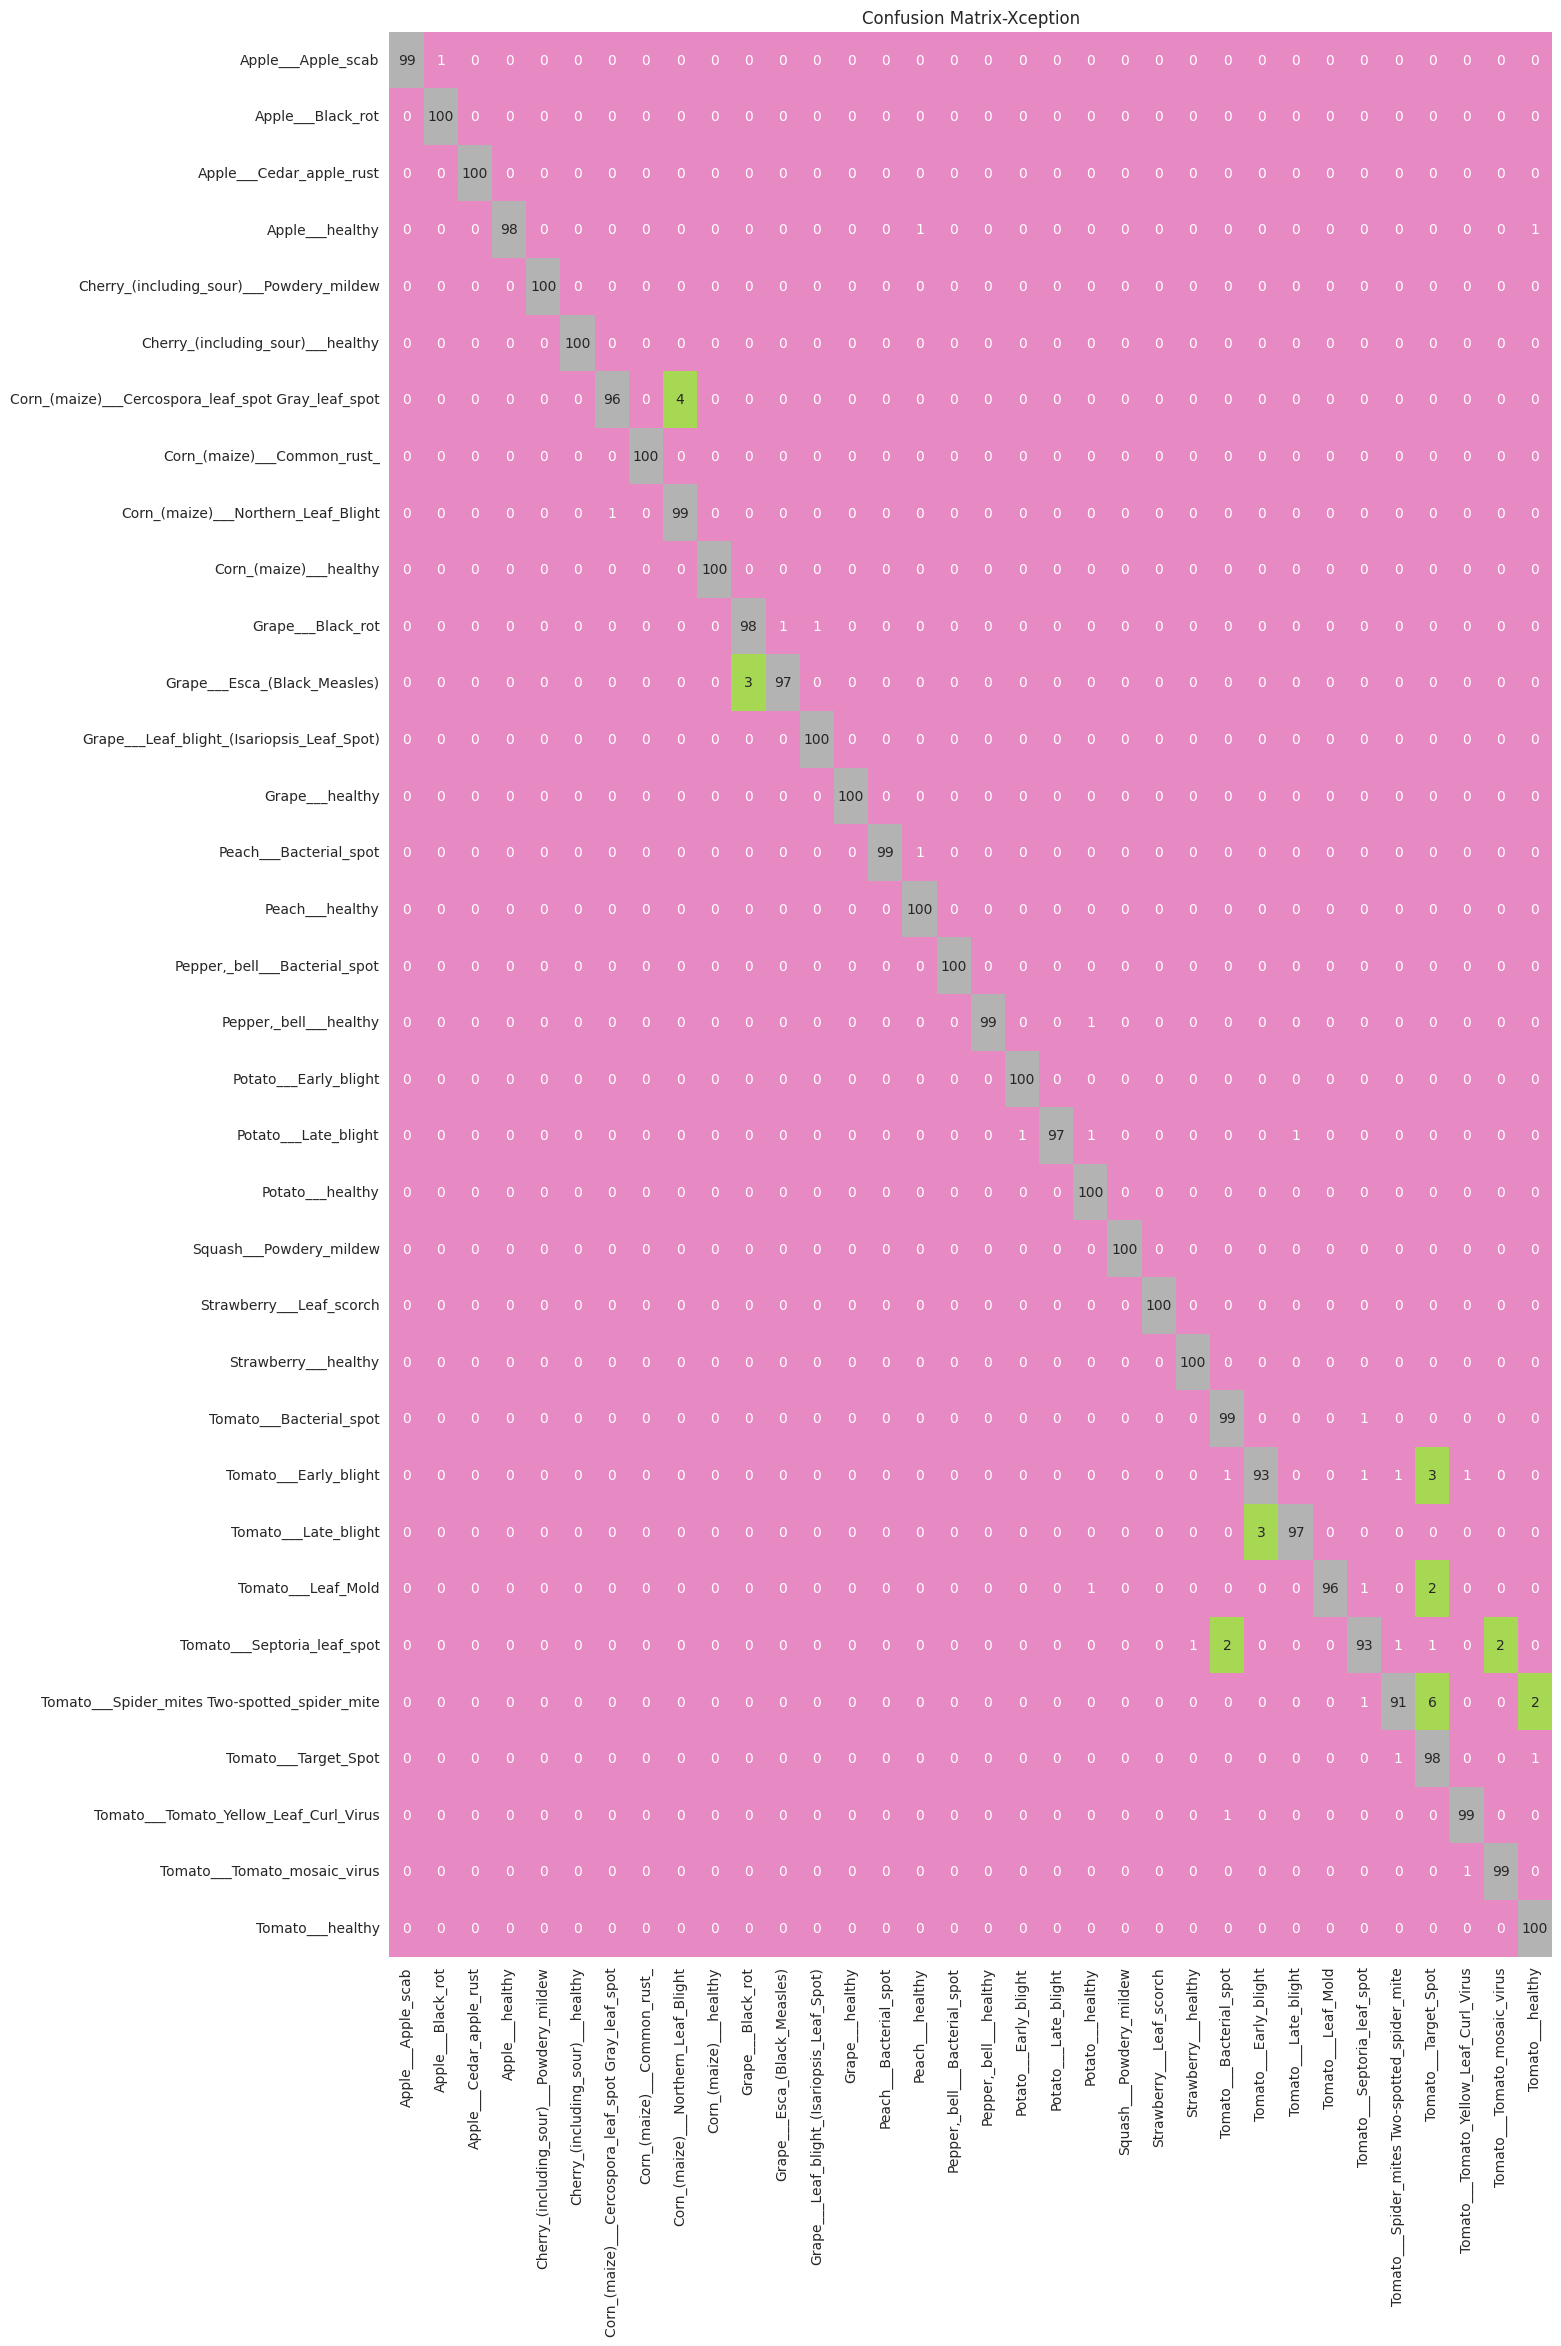

In [195]:

plt.figure(figsize=(15, 25))
sns.heatmap(cm_xception, fmt='d', center=True, cbar=False, annot=True,cmap='Set2',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix-Xception')
plt.show()

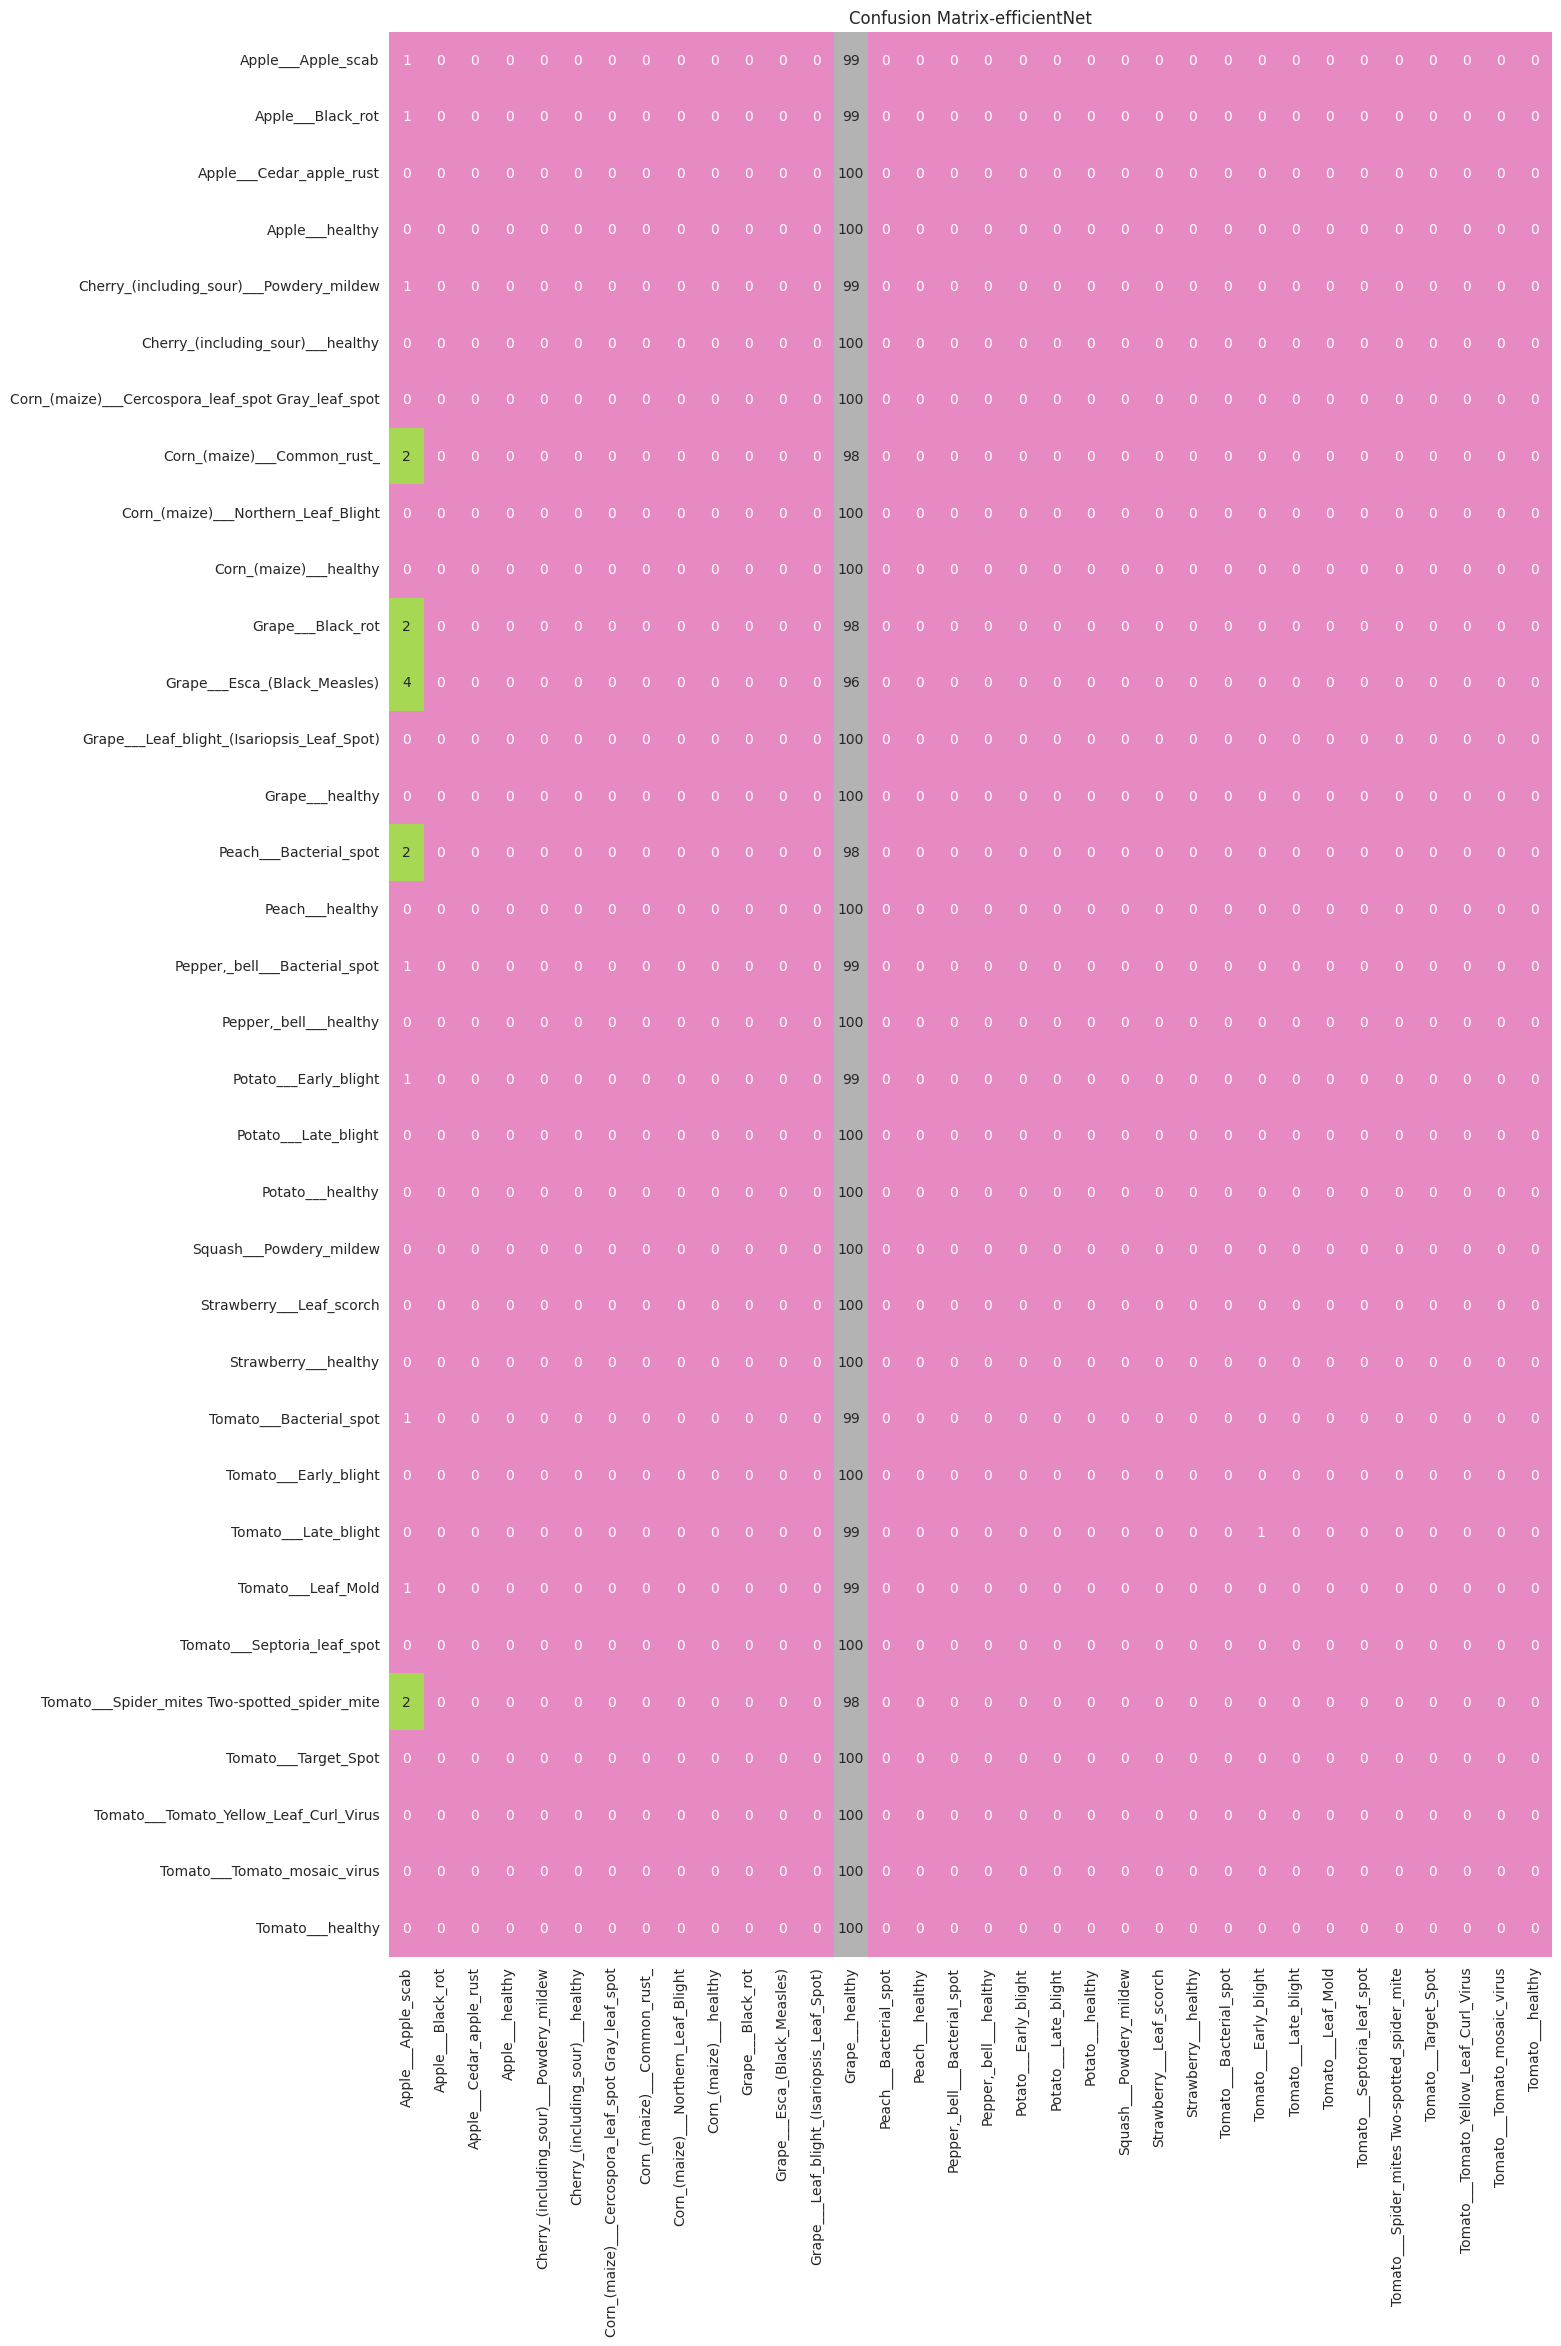

In [197]:

plt.figure(figsize=(15, 25))
sns.heatmap(cm_efficientnet, fmt='g', center=True, cbar=False, annot=True, cmap='Set2',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix-efficientNet')
plt.show()

107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step


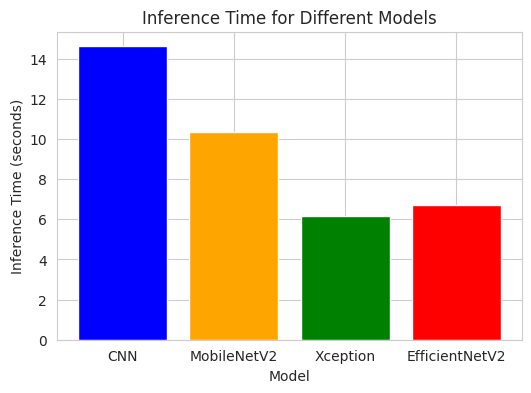

In [207]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Function to measure inference time
def measure_inference_time(model, test_data):
    start_time = time.time()
    model.predict(test_data)
    end_time = time.time()
    return end_time - start_time

# Measure inference time for each model using test_gen
inference_times = {
    "CNN": measure_inference_time(cnn_model, test_gen),
    "MobileNetV2": measure_inference_time(mn_model, test_gen),
    "Xception": measure_inference_time(xception_model, test_gen),
    "EfficientNetV2": measure_inference_time(e_model, test_gen),
}

# Plot inference times
plt.figure(figsize=(6, 4))
plt.bar(inference_times.keys(), inference_times.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Inference Time (seconds)")
plt.title("Inference Time for Different Models")
plt.show()


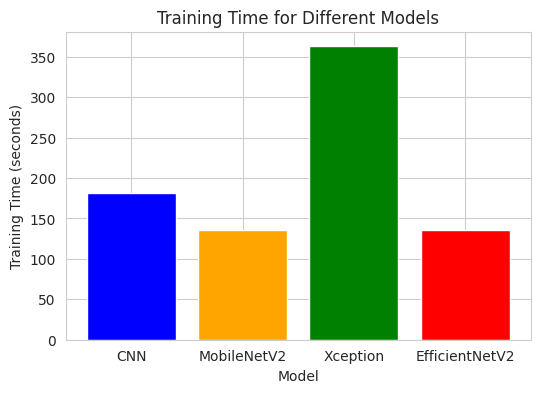

In [203]:
# Replace with actual training times recorded during training
training_times = {
    "CNN": cnn_training_time,
    "MobileNetV2": mn_training_time,
    "Xception": xception_training_time,
    "EfficientNetV2": e_training_time,
}

# Plot training times
plt.figure(figsize=(6, 4))
plt.bar(training_times.keys(), training_times.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time for Different Models")
plt.show()


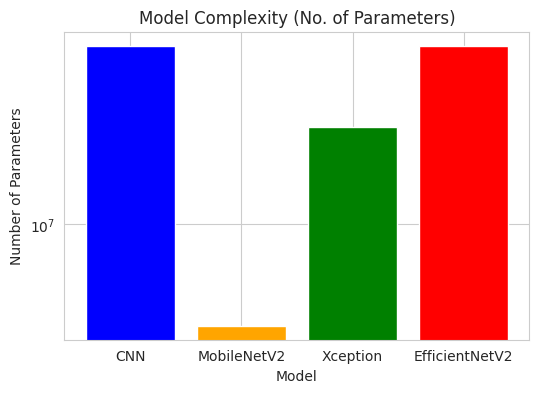

In [204]:
# Get the number of parameters for each model
model_params = {
    "CNN": cnn_model.count_params(),
    "MobileNetV2": mobilenet_model.count_params(),
    "Xception": xception_model.count_params(),
    "EfficientNetV2": e_model.count_params(),
}

# Plot parameters count
plt.figure(figsize=(6, 4))
plt.bar(model_params.keys(), model_params.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Number of Parameters")
plt.title("Model Complexity (No. of Parameters)")
plt.yscale("log")  # Log scale for better visualization
plt.show()
